<a href="https://colab.research.google.com/github/alberttg-ops/chocolate-sales-classifier-model-training/blob/main/chocolate_sales_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Imporitng important basic libraries, functions and models. Setting basic variables.

In [1]:

import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10,6)


Importing kagglehub library as it is not part of pre-installed colab environment.

In [2]:
pip install kagglehub

Imporitng kagglehub and then importing the dataset from the api call pathway provided kagglehub


In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("saidaminsaidaxmadov/chocolate-sales")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'chocolate-sales' dataset.
Path to dataset files: /kaggle/input/chocolate-sales


Importing teh dataset from the path found and storing it into a variable named df.

In [4]:

import os

# Construct the full path to the CSV file
csv_file_name = "Chocolate Sales (2).csv"
full_csv_path = os.path.join(path, csv_file_name)

# Load the CSV file into a DataFrame
df = pd.read_csv(full_csv_path)

print(f"Successfully loaded '{csv_file_name}' into a DataFrame named 'df'.")
display(df.head())

Successfully loaded 'Chocolate Sales (2).csv' into a DataFrame named 'df'.


,Sales Person,Country,Product,Date,Amount,Boxes Shipped
0,Jehu Rudeforth,UK,Mint Chip Choco,04/01/2022,"$5,320.00",180
1,Van Tuxwell,India,85% Dark Bars,01/08/2022,"$7,896.00",94
2,Gigi Bohling,India,Peanut Butter Cubes,07/07/2022,"$4,501.00",91
3,Jan Morforth,Australia,Peanut Butter Cubes,27/04/2022,"$12,726.00",342
4,Jehu Rudeforth,UK,Peanut Butter Cubes,24/02/2022,"$13,685.00",184


Trying to get info of the dataset.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3282 entries, 0 to 3281
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Sales Person   3282 non-null   object
 1   Country        3282 non-null   object
 2   Product        3282 non-null   object
 3   Date           3282 non-null   object
 4   Amount         3282 non-null   object
 5   Boxes Shipped  3282 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 154.0+ KB


In [6]:
df.describe(include="all")


,Sales Person,Country,Product,Date,Amount,Boxes Shipped
count,3282,3282,3282,3282,3282,3282.000000
unique,25,6,22,504,3013,NaN
top,Kelci Walkden,Australia,Eclairs,13/01/2024,"$2,317.00",NaN
freq,162,615,180,16,5,NaN
mean,NaN,NaN,NaN,NaN,NaN,164.666971
std,NaN,NaN,NaN,NaN,NaN,124.024736
min,NaN,NaN,NaN,NaN,NaN,1.000000
25%,NaN,NaN,NaN,NaN,NaN,71.000000
50%,NaN,NaN,NaN,NaN,NaN,137.000000
75%,NaN,NaN,NaN,NaN,NaN,232.000000


Fixing the amount colum to numberic value


In [7]:
df["Amount"] = df["Amount"].str.replace("$", "", regex=False)
df["Amount"] = df["Amount"].str.replace(",", "", regex=False)
df["Amount"] = df["Amount"].astype(float)


verification

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3282 entries, 0 to 3281
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Sales Person   3282 non-null   object 
 1   Country        3282 non-null   object 
 2   Product        3282 non-null   object 
 3   Date           3282 non-null   object 
 4   Amount         3282 non-null   float64
 5   Boxes Shipped  3282 non-null   int64  
dtypes: float64(1), int64(1), object(4)
memory usage: 154.0+ KB


the amount has been converted into float.

Converting the format of date from `object` to `date` and verifying it.

In [9]:
df["Date"] = pd.to_datetime(df["Date"], dayfirst=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3282 entries, 0 to 3281
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Sales Person   3282 non-null   object        
 1   Country        3282 non-null   object        
 2   Product        3282 non-null   object        
 3   Date           3282 non-null   datetime64[ns]
 4   Amount         3282 non-null   float64       
 5   Boxes Shipped  3282 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 154.0+ KB


The above two conversion ensured that the training of the dataset would produce proper resutl as string value of `amount` would not be trained properly. The case if same for `date` as the "date" format has more details than the object format, creating ease of training.

In [10]:
threshold = df["Amount"].median()
threshold


5225.5

Going to take median as the classification value as mostly in sales, the higher values and lower value sales might give a mean which would bias the training towards outlier in the sales in either end. Also since median divides the table with classificaiton of 50% as high sale and low sale, this can be used to train a model that will classify a new data of sales as high or low.

In [11]:
df["High_Sale"] = (df["Amount"] >= threshold).astype(int)
df["High_Sale"].value_counts()


,count
High_Sale,
1,1641
0,1641


Next, plotting various graphs to find which variables (columns ) affecct the final result and which one does not and can be discarded

Class balance plot

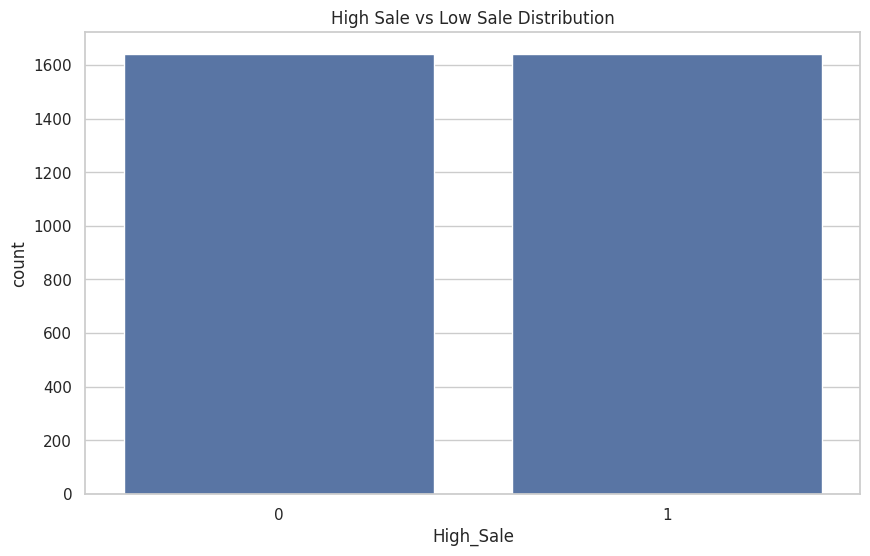

In [12]:
sns.countplot(x="High_Sale", data=df)
plt.title("High Sale vs Low Sale Distribution")
plt.show()


Amount distribution graph

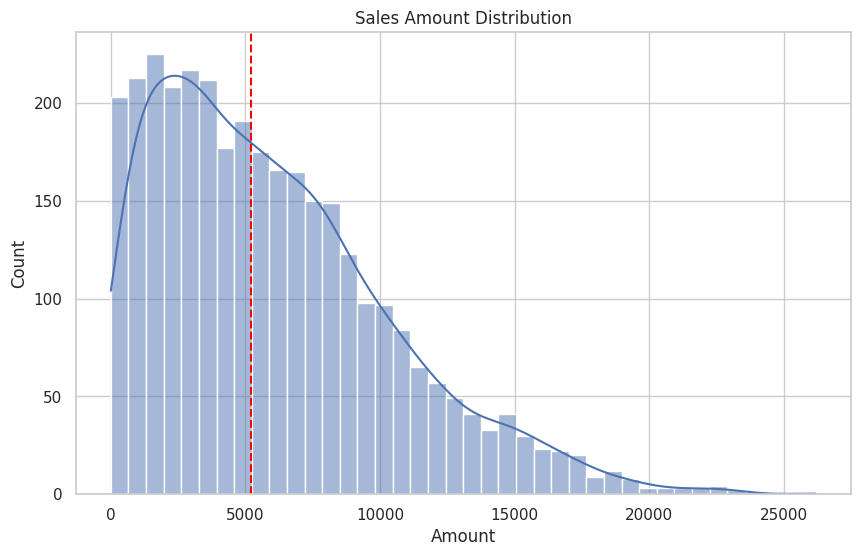

In [13]:
sns.histplot(df["Amount"], bins=40, kde=True)
plt.axvline(threshold, color="red", linestyle="--")
plt.title("Sales Amount Distribution")
plt.show()


Amount by Country graph

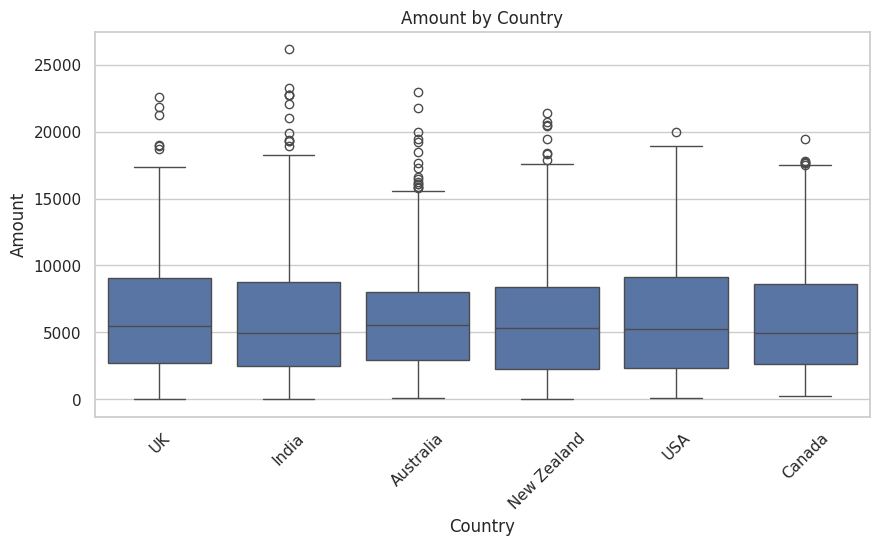

In [14]:
plt.figure(figsize=(10,5))
sns.boxplot(x="Country", y="Amount", data=df)
plt.xticks(rotation=45)
plt.title("Amount by Country")
plt.show()


product impact on sales

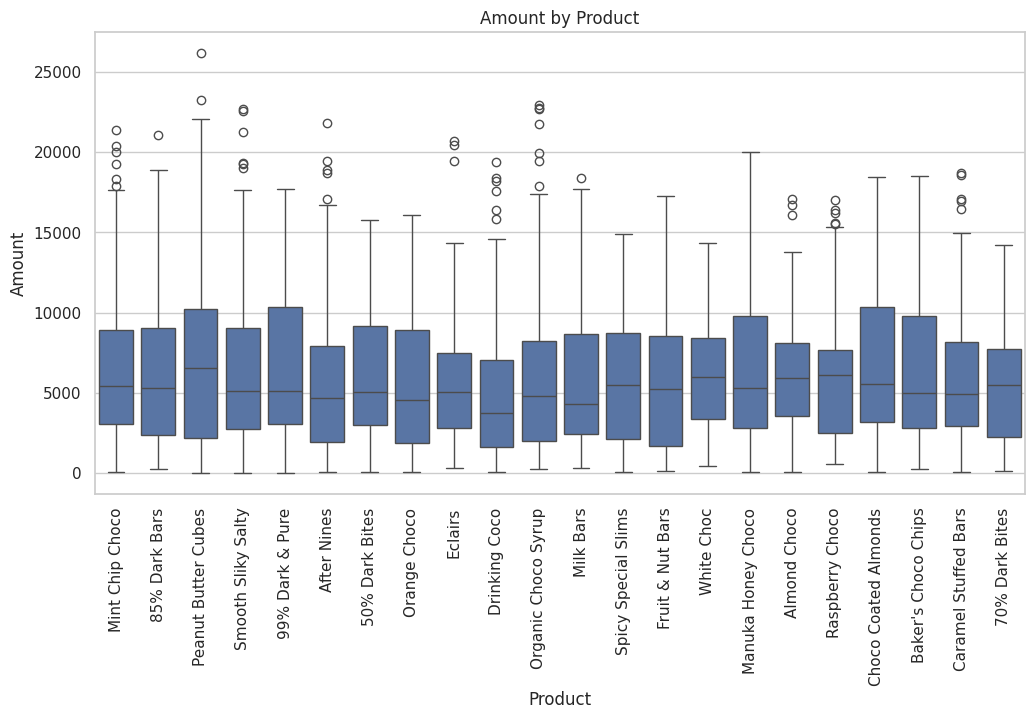

In [15]:
plt.figure(figsize=(12,6))
sns.boxplot(x="Product", y="Amount", data=df)
plt.xticks(rotation=90)
plt.title("Amount by Product")
plt.show()


The sales distribution graph is positively skewed with a long right tail indicating occational right trnasactions. This validates the choice to choose median based binarization for classification label creation.

---

The sales in various coutnries are almost similar with median aroudn 5000. This is a poor variable affecting sales.


----

Some products sell higher than other products indicating this is a good variable affecting sales and has to be targetted.

----

The variable amount is rmeoved from target training since the variable high value sale and low value sale is derived fromt it.

In [17]:
df["Year"] = df["Date"].dt.year
df["Month"] = df["Date"].dt.month
df["Day"] = df["Date"].dt.day
df["Weekday"] = df["Date"].dt.weekday


In [18]:
df = df.drop(columns=["Date"])


In [19]:
X = df.drop(columns=["High_Sale", "Amount"])
y = df["High_Sale"]


In [20]:
X.head()


,Sales Person,Country,Product,Boxes Shipped,Year,Month,Day,Weekday
0,Jehu Rudeforth,UK,Mint Chip Choco,180,2022,1,4,1
1,Van Tuxwell,India,85% Dark Bars,94,2022,8,1,0
2,Gigi Bohling,India,Peanut Butter Cubes,91,2022,7,7,3
3,Jan Morforth,Australia,Peanut Butter Cubes,342,2022,4,27,2
4,Jehu Rudeforth,UK,Peanut Butter Cubes,184,2022,2,24,3


Applying hot encoding to saleperson, country name and product name.

In [21]:
X = pd.get_dummies(X, drop_first=True)


In [22]:
X.shape


(3282, 55)

Splitting into trianing dataset and testing dataset

In [23]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


Going to scale variables next as the variables numberic range of values vary vary high.

In [29]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Staring with the most basic logistic regression.

In [30]:
log_model = LogisticRegression(max_iter=1000)

log_model.fit(X_train_scaled, y_train)


LogisticRegression(max_iter=1000)

Evaluating the model

Accuracy: 0.5403348554033486

Classification Report:
               precision    recall  f1-score   support

           0       0.55      0.53      0.54       335
           1       0.53      0.55      0.54       322

    accuracy                           0.54       657
   macro avg       0.54      0.54      0.54       657
weighted avg       0.54      0.54      0.54       657



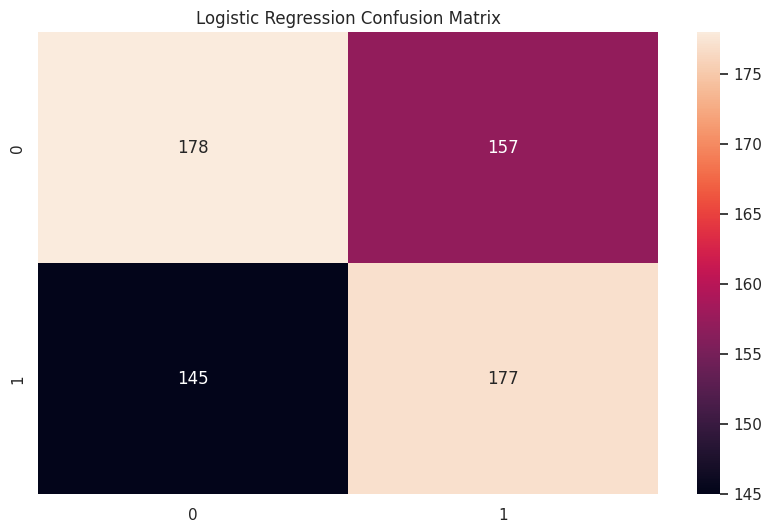

In [31]:
y_pred_log = log_model.predict(X_test_scaled)
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print("\nClassification Report:\n", classification_report(y_test, y_pred_log))

cm = confusion_matrix(y_test, y_pred_log)
sns.heatmap(cm, annot=True, fmt="d")
plt.title("Logistic Regression Confusion Matrix")
plt.show()


Logistic regression fails as this model classified on the basis of a linear growth and the dataset used here was non-liner and interactive-dependent. Retail depends on a combination of values and hence this model fails.

Choosing Random forest classifer which workds well for non-linear data and high dimensionality.


The accuracy of this model is hardly as good as just predicting head or tails.

In [32]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(
    n_estimators=200,
    random_state=42
)

rf_model.fit(X_train, y_train)


RandomForestClassifier(n_estimators=200, random_state=42)

Evaluating the result.

Accuracy: 0.9452054794520548

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.96      0.95       335
           1       0.96      0.93      0.94       322

    accuracy                           0.95       657
   macro avg       0.95      0.94      0.95       657
weighted avg       0.95      0.95      0.95       657



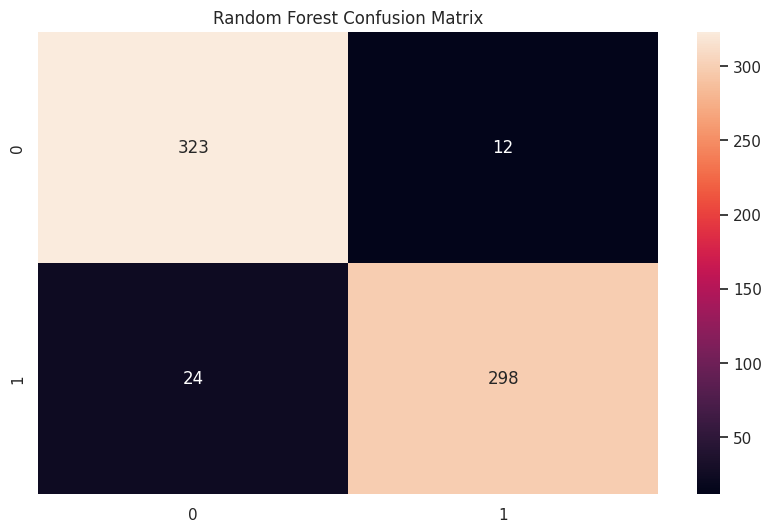

In [33]:
y_pred_rf = rf_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, fmt="d")
plt.title("Random Forest Confusion Matrix")
plt.show()


The model accuracy is extremely high and the model trained is optimal for the situation. But to ensure no overfitting, a retest over the model is to be performed.

Possible doubt over the model remembering saleperson names.

In [34]:
X2 = df.drop(columns=["High_Sale", "Amount", "Sales Person"])
y2 = df["High_Sale"]
X2 = pd.get_dummies(X2, drop_first=True)


In [35]:
X2_train, X2_test, y2_train, y2_test = train_test_split(
    X2, y2, test_size=0.2, random_state=42
)


In [36]:
rf_model2 = RandomForestClassifier(n_estimators=200, random_state=42)
rf_model2.fit(X2_train, y2_train)

y2_pred = rf_model2.predict(X2_test)

print("Accuracy:", accuracy_score(y2_test, y2_pred))
print(classification_report(y2_test, y2_pred))


Accuracy: 0.8112633181126332
              precision    recall  f1-score   support

           0       0.80      0.84      0.82       335
           1       0.83      0.78      0.80       322

    accuracy                           0.81       657
   macro avg       0.81      0.81      0.81       657
weighted avg       0.81      0.81      0.81       657



The drop in the accuracy of the model by roughly 14 percent shows that the model was partly due to the leakage of the salesperson. Though the model trained initially using Random forest might be useful when in a company with fixed employees, this model becomes less useful when a new employee joins.

Removing the feature reduced accuracy but generalized the result, ensuring that even a new employee's value of sale can be calculated.

Even when having removed the salesperson, the model still has 81% accuracy which is high compared to 54% accuracy of the logicstic regression model. This also proves that logistic regression is more suited to classification against a dataset with linear relation while random forest is best suited for classificaiton against dataset with conditional relation (Sales depend on the value of product but also the type of company due to company repuatation as added value in increasing chance of purchase, the location of the country and so on).

In [37]:

importance = pd.Series(rf_model2.feature_importances_, index=X2.columns)
importance = importance.sort_values(ascending=False)

importance.head(15)


,0
Boxes Shipped,0.230253
Day,0.177685
Month,0.110410
Weekday,0.083391
Year,0.034068
Country_India,0.024806
Country_Canada,0.023101
Country_USA,0.022359
Country_New Zealand,0.022138
Country_UK,0.021219


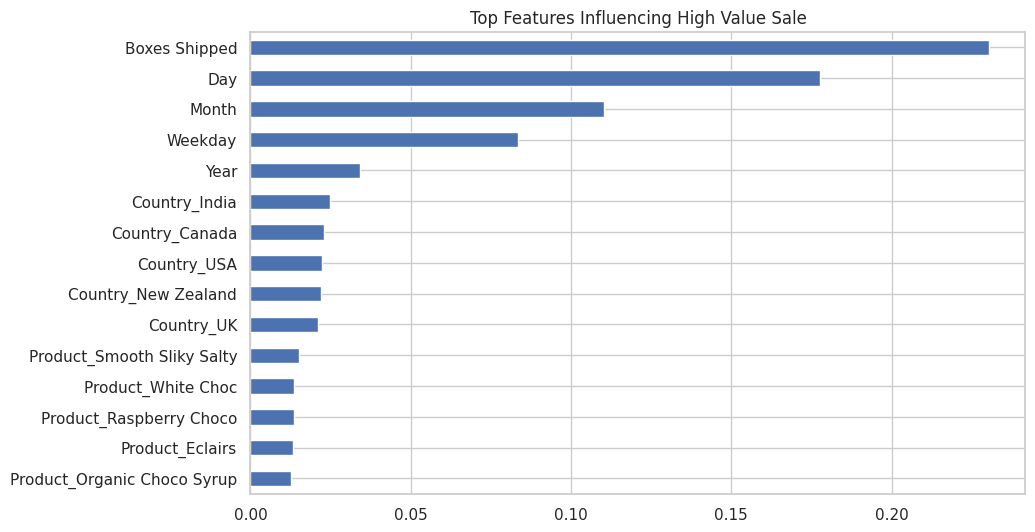

In [38]:
importance.head(15).plot(kind="barh")
plt.gca().invert_yaxis()
plt.title("Top Features Influencing High Value Sale")
plt.show()


Importance of various facotrs affecting high value sale
----

 * Boxes shipped, 0,23: This shows high importance but that was to be expected as sales value is primarily volume driven.
 * Timing:
    1. Day: 0.17
    2. Month: 0.11
    3. Weekday: 0.08

    This shows that the combined value of date does affect the sales. Most likely those days had higher discounts but the month' importance shows that this is most likely on festive seasons or holidays.
  
  * Country: The value of 0.02 shows that for this chocolate sales, the country where it is sold has nearly no effect in the sales.

  * Prodcut Features: 0.01-0.015: The value shows that Product features do matter but they matter more when it comes in line with other factors, giving rising to a sucessful sale.


In [39]:
rf_model2.score(X2_train, y2_train)


1.0

This score shows 100% overfitting on trained data but on new data it still has 81% accuracy and hence this model is aceptable. But doing k-fold cross validation with new test dataset to ensure the test accuracy was not just due to luck.

In [40]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(rf_model2, X2, y2, cv=5)

print(scores)
print("Average accuracy:", scores.mean())


[0.82039574 0.92085236 0.93140244 0.87957317 0.78658537]
Average accuracy: 0.8677618146044473


The k fold cross validation shows that the model has an average accuracy of 86%. The single test split showed an accuracy of 81%.

This model with 100% memorization still shows 81% accuracy for single test case and 86% accuracy for average test case for general data that it was not trained with.

But still the average accuracy from 78.6% to 93.1% shows that some transaction subsets are inherently harder to classify, suggesting non-uniform purchasing across records.

Performing one final ROC curve analysis and ROC AUC socre analysis

In [41]:
from sklearn.metrics import roc_curve, roc_auc_score
y_probs = rf_model2.predict_proba(X2_test)[:,1]
fpr, tpr, thresholds = roc_curve(y2_test, y_probs)


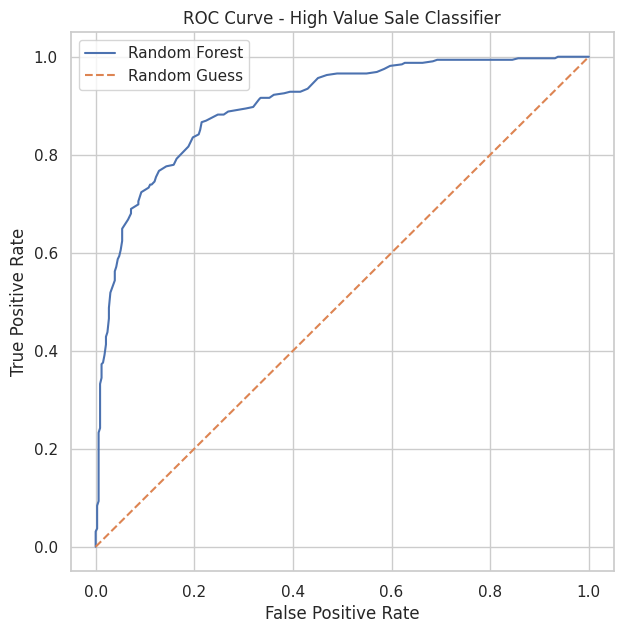

In [42]:
plt.figure(figsize=(7,7))
plt.plot(fpr, tpr, label="Random Forest")
plt.plot([0,1],[0,1], linestyle="--", label="Random Guess")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - High Value Sale Classifier")
plt.legend()
plt.show()


In [43]:
auc = roc_auc_score(y2_test, y_probs)
print("AUC:", auc)


AUC: 0.9017567442291647


The ROC AUC value shows that the model predicts 90% of the time correctly even for a higher value sale at the far end.

The RO graph shows that the actual model steeps high at the start itself leaning towards the top left, away from the random guessing. This means that the models shall classify high sales as high sale and low sales and low sales effectively.

CONCLUSION
---

This project was aimed at classifying sales trasaction into high value and low value categories using classification models.

Since the dataset did not contain the predefined target variable, a classification variable was engineered by converting revenue into a binary value using the median of all revenue. The median was chosen as the revenue distribution was positively skewed and since median is robust to high value transactions.

Data was converted into appropriate types as for training.

EDA analysis showed which kind of data has more influence on the sales.

Logistic regression, which is a linear model, only showed 54% accuracy, just above simply predicitng randomly.

Random forest, which is a tree model, showed high accuracy of 95% but further testing found that the salesperson data had made it overfit towards that particular data more. This was problematic in case of deployment if a new employee joins the company.

Removing the salesperson made the random forest model have a high accuracy of 81%.

Verification using 5 fold cross validation showed 86% accuracy.
Training accuracy of 100%
ROC AUC score: 0.90

This does show that the mdoel has to be chosen as per the dataset.

----

Final conclusion:

Sales is governed by the conditional interaction between shipment size, product type and temporal patterns.
